In [1]:
import os
import sys
sys.path.append('/nfs/t3/workingshop/chenxiayu/code/MagicBox')
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from scipy.stats.stats import ttest_ind, sem, pearsonr
from matplotlib import pyplot as plt
from magicbox.stats import EffectSize
from magicbox.algorithm.plot import auto_bar_width, MidpointNormalize
from cxy_hcp_ffa.lib.predefine import proj_dir, mmp_name2label

anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
calc_dir = pjoin(anal_dir, 'NI_R2')
work_dir = pjoin(calc_dir, 'plot')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# Tools

In [2]:
def plot_mat(data, row_names, col_names, out_file,
             figsize, title, cmap='coolwarm', mid_norm=True,
             show_name=True, show_grid=False, show_value=False,
             show_cbar=True, cbar_orientation='vertical', cbar_shrink=1.0):
    """
    show image for 一般矩阵
    """
    n_row = len(row_names)
    n_col = len(col_names)
    fig, ax = plt.subplots(figsize=figsize)
    xticks = np.arange(n_col)
    yticks = np.arange(n_row)
    if mid_norm:
        img = ax.imshow(data, cmap, norm=MidpointNormalize(midpoint=0.))
    else:
        img = ax.imshow(data, cmap)
    if show_cbar:
        fig.colorbar(img, orientation=cbar_orientation, shrink=cbar_shrink)
    if show_name:
        ax.set_xticks(xticks)
        ax.set_xticklabels(col_names)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
        ax.set_yticks(yticks)
        ax.set_yticklabels(row_names)
        plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
    else:
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    if show_grid:
        grid_xticks = np.r_[xticks-.5, xticks[-1]+.5]
        grid_yticks = np.r_[yticks-.5, yticks[-1]+.5]
        ax.set_xticks(grid_xticks, minor=True)
        ax.set_yticks(grid_yticks, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", bottom=False, left=False)

    if show_value:
        for i in range(n_row):
            for j in range(n_col):
                if np.isnan(data[i, j]):
                    continue
                ax.text(j, i, '{:.2f}'.format(data[i, j]),
                        ha="center", va="center", color="k")

    fig.tight_layout()
    if out_file == 'show':
        fig.show()
    else:
        fig.savefig(out_file)

# Plot BOLD CNR

#subject of pFus: 2038
#subject of mFus: 2078
Ttest_indResult(statistic=26.615238744361672, pvalue=3.8479468771119845e-144)
CohenD: 0.8297422178246002


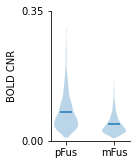

In [2]:
ylims = (0, 0.35)
fname = 'individual-FFA_BOLD-CNR'
figsize = (2, 2.4)
cnr_file = pjoin(calc_dir, f'CNR/{fname}.pkl')
ylabel = 'BOLD CNR'
Hemis = ('L', 'R')
roi_names = ('pFus', 'mFus')
out_file = pjoin(work_dir, f'{fname}.svg')
# out_file = 'show'

es = EffectSize()
cnr_dict = pkl.load(open(cnr_file, 'rb'))
n_roi = len(roi_names)
x = np.arange(1, n_roi + 1)
data_points = []
fig, ax = plt.subplots(figsize=figsize)
for roi_name in roi_names:
    data_points_tmp = []
    for Hemi in Hemis:
        data = cnr_dict[f'{Hemi}_{roi_name}']
        data_points_tmp.extend(data[~np.isnan(data)])
    data_points.append(data_points_tmp)
    print(f'#subject of {roi_name}:', len(data_points_tmp))
print(ttest_ind(*data_points))
print(f'CohenD: {es.cohen_d(*data_points)}')
ax.violinplot(data_points, x, showmeans=True, showextrema=False)
ax.set_xticks(x)
ax.set_xticklabels(roi_names)
ax.set_ylabel(ylabel)
ax.set_ylim(*ylims)
ax.set_yticks(ylims)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# Plot zstat corr beta

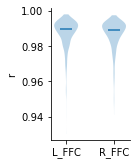

In [2]:
figsize = (2, 2.4)
fname = 'corr_in_FFC'
roi_names = ('L_FFC', 'R_FFC')
fpath = pjoin(calc_dir, f'zstat_corr_beta/{fname}.pkl')
out_file = pjoin(work_dir, f'{fname}.svg')
# out_file = 'show'

n_roi = len(roi_names)
x = np.arange(1, n_roi + 1)
data = pkl.load(open(fpath, 'rb'))
datasets = []
fig, ax = plt.subplots(figsize=figsize)
for roi in roi_names:
    datasets.append(data[roi][~np.isnan(data[roi])])
# ax.violinplot(datasets, x, showmeans=True, showextrema=False)
ax.violinplot(datasets, x, showmedians=True, showextrema=False)
ax.set_xticks(x)
ax.set_xticklabels(roi_names)
ax.set_ylabel('r')
# ax.set_ylim(*ylims)
# ax.set_yticks(ylims)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)

# plot RSFC pattern

ignore targets: ['L_FFC', 'L_V8', 'L_PIT', 'L_PH', 'L_TE2p', 'L_TF', 'L_VVC', 'R_FFC', 'R_V8', 'R_PIT', 'R_PH', 'R_TE2p', 'R_TF', 'R_VVC']
346
===lh===
---gap corr pFus-faces---
(0.9835990782206393, 5.753016157895385e-258)

---gap corr mFus-faces---
(0.9397572247699625, 1.9786436103111924e-162)

---gap corr FFC---
(0.9948326017708615, 0.0)

---gap corr V8---
(0.9434958168300359, 4.4946396334443254e-167)

---gap corr PIT---
(0.9230304142815337, 9.129003328625199e-145)

---gap corr PH---
(0.9012738725453455, 5.202420001925398e-127)

---gap corr TE2p---
(0.7733070968454449, 4.680758477951743e-70)

---gap corr TF---
(0.7173369416721798, 6.164120827726356e-56)

---gap corr VVC---
(0.9673809513816265, 3.262413720982538e-207)

===rh===
---gap corr pFus-faces---
(0.9942782545794714, 0.0)

---gap corr mFus-faces---
(0.972603672352817, 4.73449993372093e-220)

---gap corr FFC---
(0.9981416517192506, 0.0)

---gap corr V8---
(0.9464216715675925, 6.194443105671019e-171)

---gap corr PIT---
(0.945935

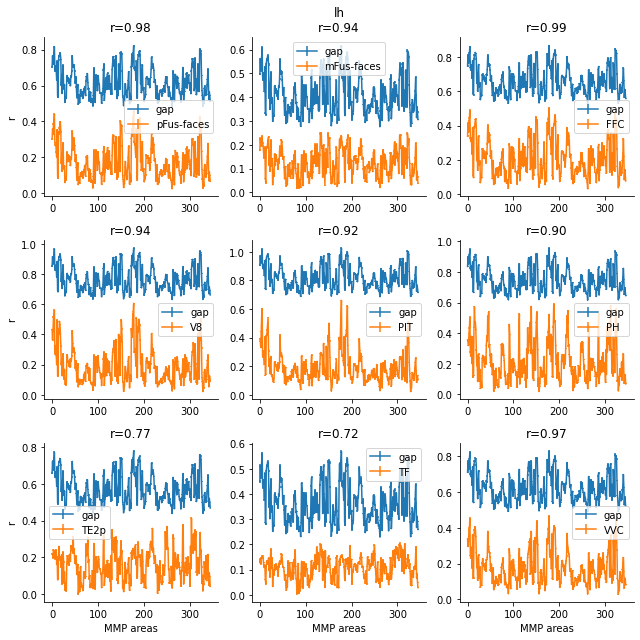

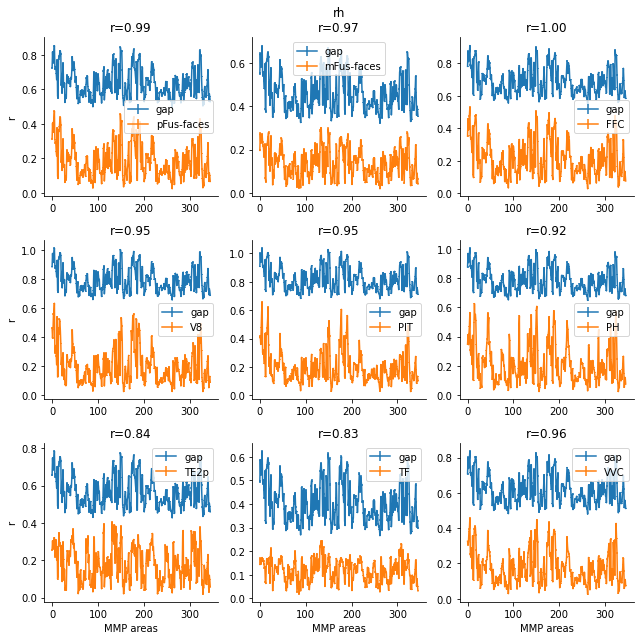

In [4]:
n_row, n_col = 3, 3
figsize = (9, 9)
hemis = ('lh', 'rh')
gap_type = 'gap1-in-FFC'
seeds = ['FFA-gap', 'pFus-faces', 'mFus-faces',
         'FFC', 'V8', 'PIT', 'PH', 'TE2p', 'TF', 'VVC']
ignore_rois = [f'L_{i}' for i in seeds[3:]] + [f'R_{i}' for i in seeds[3:]]
targets = list(mmp_name2label.keys())
trg_indices = [i for i, j in enumerate(targets) if j not in ignore_rois]
print('ignore targets:', ignore_rois)
print(len(trg_indices))
fpath = pjoin(calc_dir, f'rfMRI/rsfc_{gap_type}.pkl')
out_file = pjoin(work_dir, 'rsfc_pattern_{gap_type}_{hemi}.jpg')
# out_file = 'show'

x = np.arange(len(trg_indices))
data = pkl.load(open(fpath, 'rb'))
for hemi in hemis:
    assert seeds == data[hemi]['seed']
    assert targets == data[hemi]['target']
    gap_data = data[hemi]['data'][:, 0, trg_indices]
    gap_y = np.mean(gap_data, 0)
    gap_yerr = sem(gap_data, 0)
    fig, axes = plt.subplots(3, 3, figsize=figsize)
    print(f'==={hemi}===')
    for seed_idx, seed in enumerate(seeds):
        if seed == 'FFA-gap':
            continue
        row_idx = int((seed_idx - 1) / n_col)
        col_idx = (seed_idx - 1) % n_col
        ax = axes[row_idx, col_idx]
        seed_data = data[hemi]['data'][:, seed_idx, trg_indices]
        seed_y = np.mean(seed_data, 0)
        seed_yerr = sem(seed_data, 0)
        ax.errorbar(x, gap_y+seed_y.max(), gap_yerr, label='gap')
        ax.errorbar(x, seed_y, seed_yerr, label=seed)
        ax.legend()
        if col_idx == 0:
            ax.set_ylabel('r')
        if (row_idx + 1) == n_row:
            ax.set_xlabel('MMP areas')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        print(f'---gap corr {seed}---')
        r_data = pearsonr(gap_y, seed_y)
        print(r_data, end='\n\n')
        if row_idx == 0 and col_idx == int(n_col / 2):
            ax.set_title('{}\nr={:.2f}'.format(hemi, r_data[0]))
        else:
            ax.set_title('r={:.2f}'.format(r_data[0]))
    fig.tight_layout()
    if out_file == 'show':
        fig.show()
    else:
        fig.savefig(out_file.format(gap_type=gap_type, hemi=hemi))

# Plot cope pattern

## 画出gap，个体FFA，FFC及其周围脑区的各条件激活的bar图

===lh===
---gap corr pFus-faces---
(0.584723039165763, 0.1279090766640507)

---gap corr mFus-faces---
(0.46406267013523905, 0.2467340175496994)

---gap corr FFC---
(0.7931483055829709, 0.01883602972320369)

---gap corr V8---
(0.7734437289405683, 0.024355624849736218)

---gap corr PIT---
(0.8776938359762472, 0.004164585342046684)

---gap corr PH---
(0.9771991705777268, 2.912966300542724e-05)

---gap corr TE2p---
(0.9491880221118314, 0.00031560145739339344)

---gap corr TF---
(0.8041366450376543, 0.016133194191502578)

---gap corr VVC---
(0.8373475544298343, 0.009488117730934107)

===rh===
---gap corr pFus-faces---
(0.5850479782591234, 0.12764536167506613)

---gap corr mFus-faces---
(0.4275904211207684, 0.2906302354928626)

---gap corr FFC---
(0.7635752008029825, 0.02745709332645838)

---gap corr V8---
(0.8103956190914956, 0.014709269445363929)

---gap corr PIT---
(0.8560680617566722, 0.006672851703350992)

---gap corr PH---
(0.9945312810420115, 4.072056935499493e-07)

---gap corr TE2p--

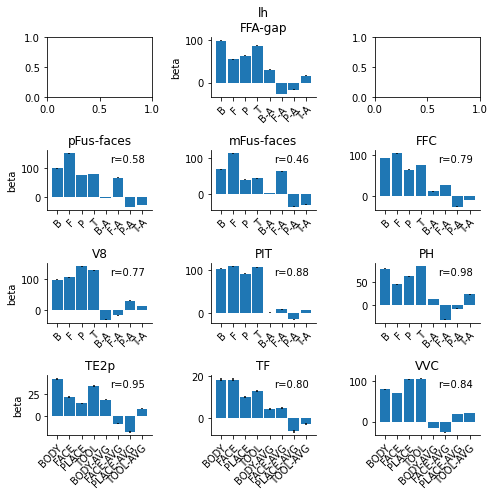

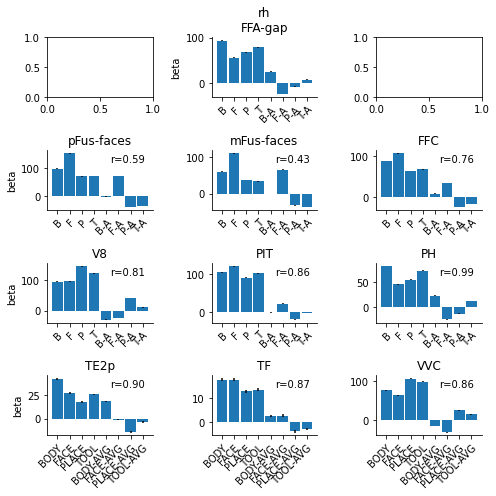

In [4]:
n_row, n_col = 4, 3
figsize = (7, 7)
hemis = ('lh', 'rh')
gap_type = 'gap1-in-FFC_thr0'
rois = ['FFA-gap', 'pFus-faces', 'mFus-faces',
        'FFC', 'V8', 'PIT', 'PH', 'TE2p', 'TF', 'VVC']
copes = ['BODY', 'FACE', 'PLACE', 'TOOL',
         'BODY-AVG', 'FACE-AVG', 'PLACE-AVG', 'TOOL-AVG']
fpath = pjoin(calc_dir, f'tfMRI/tfMRI-WM_{gap_type}.pkl')
out_file = pjoin(work_dir, 'cope_pattern_{gap_type}_{hemi}.jpg')
# out_file = 'show'

data = pkl.load(open(fpath, 'rb'))
x = np.arange(len(copes))
width = auto_bar_width(x)
xticklabels = ['B', 'F', 'P', 'T', 'B-A', 'F-A', 'P-A', 'T-A']
for hemi in hemis:
    assert rois == data[hemi]['roi']
    assert copes == data[hemi]['cope']
    sidx_vec = ~np.any(np.isnan(data[hemi]['data']), (1, 2))
    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    gap_y = None
    print(f'==={hemi}===')
    for roi_idx, roi in enumerate(rois):
        if roi == 'FFA-gap':
            row_idx = 0
            col_idx = int(n_col / 2)
        else:
            row_idx = int((roi_idx - 1) / n_col) + 1
            col_idx = (roi_idx - 1) % n_col
        ax = axes[row_idx, col_idx]
        roi_data = data[hemi]['data'][sidx_vec, roi_idx, :]
        roi_y = np.mean(roi_data, 0)
        roi_yerr = sem(roi_data, 0)
        ax.bar(x, roi_y, width, yerr=roi_yerr)
        if col_idx == 0 or row_idx == 0:
            ax.set_ylabel('beta')
        if (row_idx + 1) == n_row:
            ax.set_xticks(x)
            ax.set_xticklabels(copes)
        else:
            ax.set_xticks(x)
            ax.set_xticklabels(xticklabels)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if row_idx == 0 and col_idx == int(n_col / 2):
            ax.set_title(f'{hemi}\n{roi}')
        else:
            ax.set_title(f'{roi}')
        if roi_idx == 0 and roi == 'FFA-gap':
            gap_y = roi_y
        else:
            print(f'---gap corr {roi}---')
            r_data = pearsonr(gap_y, roi_y)
            print(r_data, end='\n\n')
            ax.text(0.6, 0.8, 'r={:.2f}'.format(r_data[0]),
                    transform=ax.transAxes)
    fig.tight_layout()
    if out_file == 'show':
        fig.show()
    else:
        fig.savefig(out_file.format(gap_type=gap_type, hemi=hemi))

## 画出各ROI各条件的激活矩阵

#valid subjects-lh: 27
#valid subjects-rh: 28


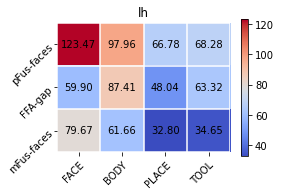

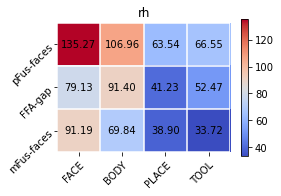

In [5]:
figsize = (4, 3)
hemis = ('lh', 'rh')
gap_type = 'gap1-in-FFC'
rois = ['pFus-faces', 'FFA-gap', 'mFus-faces']
copes = ['FACE', 'BODY', 'PLACE', 'TOOL']
fname = f'tfMRI-WM-retest_{gap_type}'
fpath = pjoin(calc_dir, f'tfMRI/{fname}.pkl')
out_files = pjoin(work_dir, 'cope_pattern_mat_{gap_type}_{hemi}.jpg')
# out_files = 'show'

data = pkl.load(open(fpath, 'rb'))
for hemi in hemis:
    cope_indices = [data[hemi]['cope'].index(i) for i in copes]
    if out_files == 'show':
        out_file = out_files
    else:
        out_file = out_files.format(gap_type=gap_type, hemi=hemi)
    sidx_vec = ~np.any(np.isnan(data[hemi]['data']), (1, 2))
    print(f'#valid subjects-{hemi}:', np.sum(sidx_vec))
    mat_data = np.zeros((len(rois), len(copes)))
    for roi_idx, roi in enumerate(rois):
        roi_idx1 = data[hemi]['roi'].index(roi)
        roi_data = data[hemi]['data'][sidx_vec, roi_idx1][:, cope_indices]
        mat_data[roi_idx] = np.mean(roi_data, 0)
    plot_mat(data=mat_data, row_names=rois, col_names=copes, out_file=out_file,
             figsize=figsize, title=hemi, cmap='coolwarm', mid_norm=False, show_name=True,
             show_grid=True, show_value=True, show_cbar=True, cbar_orientation='vertical', cbar_shrink=0.8)